## Observations and Insights 

### Observation #1
There is an observable correlation between mouse weight and tumor volume on the Capomulin regimen. The data suggests the more a mouse from the study weighs, the higher their tumor volume is.

### Observation #2
Study results for Mouse ID s185 (Capomulin regimen) indicate a positive response to the treatment regimen with the tumor volume decreasing across timepoints.

### Observation #3
Of the four treatment regimens assessed (Capomulin, Ramicane, Infubinol, Ceftamin), data suggests Capomulin and Ramicane yield the most promsing results in reduction of tumor volume.

In [307]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np 
# linegress for regression does not work without this
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')

# Display the data table for preview
mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [308]:
# Checking the number of mice
print(len(pd.unique(mouse_study_df['Mouse ID'])))

249


In [309]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint
dupl_mice = pd.DataFrame(mouse_study_df, columns=['Mouse ID', 'Timepoint'])
dupl_mice_count = dupl_mice[dupl_mice.duplicated(keep='first')]
print(dupl_mice_count)

    Mouse ID  Timepoint
909     g989          0
911     g989          5
913     g989         10
915     g989         15
917     g989         20


In [310]:
# Optional: Get all the data for the duplicate mouse ID
dupl_mice = pd.DataFrame(mouse_study_df, columns=['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'])
dupl_mice_count = dupl_mice[dupl_mice.duplicated(keep='first')]
print(dupl_mice_count)


    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   

     Tumor Volume (mm3)  Metastatic Sites  
909                45.0                 0  


In [311]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
mouse_study_clean = mouse_study_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')
mouse_study_clean.reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,0,k403,Ramicane,Male,21,16,0,45.000000,0
1,1,k403,Ramicane,Male,21,16,5,38.825898,0
2,2,k403,Ramicane,Male,21,16,10,35.014271,1
3,3,k403,Ramicane,Male,21,16,15,34.223992,1
4,4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...,...
1883,1888,z969,Naftisol,Male,9,30,25,63.145652,2
1884,1889,z969,Naftisol,Male,9,30,30,65.841013,3
1885,1890,z969,Naftisol,Male,9,30,35,69.176246,4
1886,1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [312]:
# Checking the number of mice in the clean DataFrame.
print(len(pd.unique(mouse_study_clean['Mouse ID'])))

249


## Summary Statistics

In [313]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
stats = pd.DataFrame(mouse_study_clean.groupby('Drug Regimen').count())

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
stats['Mean'] = pd.DataFrame(mouse_study_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean())
stats['Median'] = pd.DataFrame(mouse_study_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].median())
stats['Variance'] = pd.DataFrame(mouse_study_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].var())
stats['Standard Deviation'] = pd.DataFrame(mouse_study_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].std())
stats['SEM'] = pd.DataFrame(mouse_study_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem())

# Assemble the resulting series into a single summary dataframe.
stats = stats[['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']]

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
print('TUMOR VOLUME SUMMARY STATISTICS BY DRUG REGIMEN')
stats.head()

TUMOR VOLUME SUMMARY STATISTICS BY DRUG REGIMEN


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [314]:
# Using the aggregation method, produce the same summary statistics in a single line
mouse_study_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].aggregate(['mean', 'median', 'var', 'std', 'sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

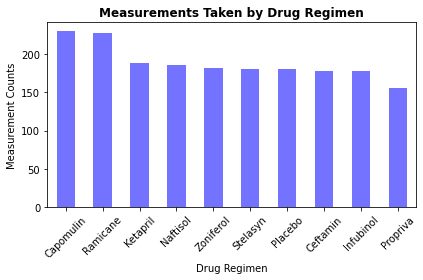

In [315]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

# Get the counts of measurements taken by each drug regimen + plot using pandas
mouse_study_clean['Drug Regimen'].value_counts().plot(kind='bar', alpha=.55, facecolor='blue', rot='45')

# Add the title and axis labels
plt.title('Measurements Taken by Drug Regimen', weight='bold')
plt.xlabel('Drug Regimen')
plt.ylabel('Measurement Counts')

# Show the bar chart
plt.tight_layout()
plt.show()

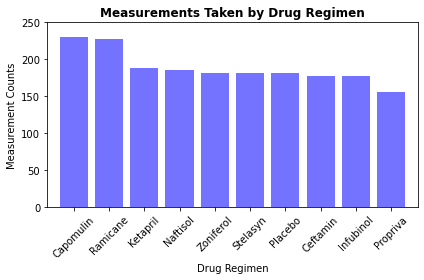

In [316]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

# Define the x-axis and tick locations
measures = mouse_study_clean['Drug Regimen'].value_counts()
x_axis = np.arange(len(measures))
tick_locations = [value for value in x_axis]

# Plot the bar chart and x-axis tick locations
plt.bar(x_axis, measures, color='b', alpha=.55, align='center')
plt.xticks(tick_locations, measures.index.values, rotation=45)

# Set the limits on x-axis and y-axis
plt.xlim(-.75, len(x_axis)-.25)
plt.ylim(0, max(measures)+20)

# Add chart title and axis labels
plt.title('Measurements Taken by Drug Regimen', weight='bold')
plt.xlabel('Drug Regimen')
plt.ylabel('Measurement Counts')

# Show the chart
plt.tight_layout()
plt.show()

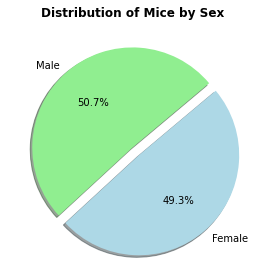

In [317]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Get the counts of mice by gender + plot using pandas
mouse_study_clean['Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True, startangle=40, explode=[0,0.1], colors=['lightgreen','lightblue'])

# Show the pie chart
plt.title('Distribution of Mice by Sex', weight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()

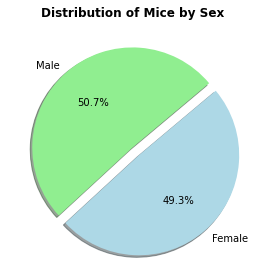

In [318]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Get the counts of mice by gender + plot using pyplot
sex = mouse_study_clean['Sex'].value_counts()
labels=['Male','Female']
colors=['lightgreen', 'lightblue']
explode=(0,0.1)
plt.pie(sex, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', shadow=True, startangle=40)

# Show the pie chart
plt.title('Distribution of Mice by Sex', weight='bold')
plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [319]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
tumor_vol = mouse_study_clean.groupby(['Mouse ID'])['Timepoint'].max().reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_vol_last = tumor_vol[['Mouse ID', 'Timepoint']].merge(mouse_study_clean, on=['Mouse ID', 'Timepoint'], how='left')

tumor_vol_last

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [320]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

for drug in drugs:

    # locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = tumor_vol_last.loc[tumor_vol_last['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    # append to tumor_vol_list
    tumor_vol_list.append(final_tumor_vol)

    # calculate the IQR and quantitatively determine if there are any potential outliers
    quartiles = final_tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq
    
    # determine upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    # print results
    print('----------------------------')
    print(f'DRUG REGIMEN: {drug}')
    print(f'Lower quartile: {lowerq}')
    print(f'Upper quartile: {upperq}')
    print(f'Interquartile range: {iqr}')
    print(f'Values below {lower_bound} could be outliers')
    print(f'Values above {upper_bound} could be outliers')
    print('----------------------------')

    # find outliers
    outliers = final_tumor_vol[(final_tumor_vol <= lower_bound) | (final_tumor_vol >= upper_bound)]

    # print results
    # found the .empty reference on thispointer.com
    if outliers.empty == True:
        print('There are no outliers in this regimen.')
    else:
        print(f'Possible outliers: {outliers}')

----------------------------
DRUG REGIMEN: Capomulin
Lower quartile: 32.37735684
Upper quartile: 40.1592203
Interquartile range: 7.781863460000004
Values below 20.70456164999999 could be outliers
Values above 51.83201549 could be outliers
----------------------------
There are no outliers in this regimen.
----------------------------
DRUG REGIMEN: Ramicane
Lower quartile: 31.56046955
Upper quartile: 40.65900627
Interquartile range: 9.098536719999998
Values below 17.912664470000003 could be outliers
Values above 54.30681135 could be outliers
----------------------------
There are no outliers in this regimen.
----------------------------
DRUG REGIMEN: Infubinol
Lower quartile: 54.04860769
Upper quartile: 65.52574285
Interquartile range: 11.477135160000003
Values below 36.83290494999999 could be outliers
Values above 82.74144559000001 could be outliers
----------------------------
Possible outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
----------------------------
DRUG

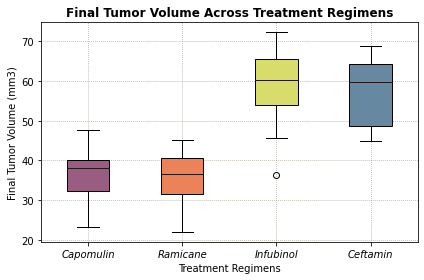

In [321]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# references for formatting: https://www.pythonpool.com/matplotlib-boxplot/
# https://www.statology.org/matplotlib-show-grid/
# https://python.tutorialink.com/bold-text-in-matplotlib-table/

fig, ax1 = plt.subplots()

# patch_artist fills the boxplot boxes
plot = ax1.boxplot(tumor_vol_list, patch_artist=True)

# define colors for boxes
colors = ['#995d81', '#eb8258', '#d8dc6a', '#6689a1']

# set colors for boxes
for patch, color in zip(plot['boxes'], colors):
    patch.set_facecolor(color)

# set color for median line
for median in plot['medians']:
    median.set(color='#22181c', linewidth=1)

# set and format title, xtick labels, x- and y-axis labels
ax1.set_title('Final Tumor Volume Across Treatment Regimens', weight='bold')
ax1.set_xticklabels(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'], style='italic')
ax1.set_xlabel('Treatment Regimens')
ax1.set_ylabel('Final Tumor Volume (mm3)')

# set grid style and color, show the grid
plt.rc('grid', linestyle=':', color='#a39b8b', linewidth=.75)
plt.grid(True)

# Show boxplot with a space-efficient layout
plt.tight_layout()
plt.show()

## Line and Scatter Plots

In [322]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# get mouse data for Capomulin regimen
capo_df = mouse_study_clean.loc[(mouse_study_clean['Drug Regimen'] == 'Capomulin')]

# set the index to Mouse ID to pull a single mouse dataset for plotting
capo_df.set_index('Mouse ID', inplace=True)

# filter data for a single Mouse ID
capo_df_s185 = capo_df.loc['s185':'s185', :]

capo_df_s185

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
s185,Capomulin,Female,3,17,0,45.000000,0
s185,Capomulin,Female,3,17,5,43.878496,0
s185,Capomulin,Female,3,17,10,37.614948,0
s185,Capomulin,Female,3,17,15,38.177232,0
s185,Capomulin,Female,3,17,20,36.866876,0
s185,Capomulin,Female,3,17,25,33.949940,0
s185,Capomulin,Female,3,17,30,32.959671,1
s185,Capomulin,Female,3,17,35,28.328531,1
s185,Capomulin,Female,3,17,40,25.472143,1


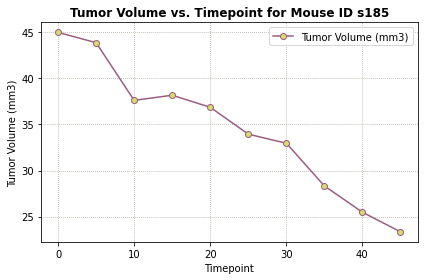

In [323]:
# plot the line plot
# formatting reference: https://www.geeksforgeeks.org/line-plot-styles-in-matplotlib/
capo_df_s185.plot('Timepoint','Tumor Volume (mm3)', color='#995d81', linestyle='solid', marker='o', markerfacecolor='#d8dc6a', markersize='6')

# set and format title, y-axis label
plt.title('Tumor Volume vs. Timepoint for Mouse ID s185', weight='bold')
plt.ylabel('Tumor Volume (mm3)')

# show and format grid lines
plt.rc('grid', linestyle=':', color='#a39b8b', linewidth=.75)
plt.grid(True)

# show the plot with efficient use of space
plt.tight_layout()
plt.show()

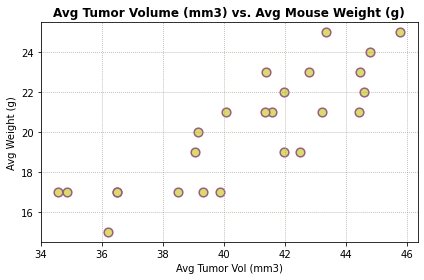

In [324]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# get Capomulin data only for scatter plot
capo_scatter = mouse_study_clean.loc[(mouse_study_clean['Drug Regimen'] == 'Capomulin')]

# get average tumor volume for Capomulin regimen
avg_tumor_vol = capo_scatter.groupby(capo_scatter['Mouse ID'])['Tumor Volume (mm3)'].mean()

# get average weight for Capomulin regimen
mouse_wgt = capo_scatter.groupby(capo_scatter['Mouse ID'])['Weight (g)'].mean()

# chart and format scatterplot
plt.scatter(avg_tumor_vol, mouse_wgt, color='#d8dc6a', edgecolors='#995d81', s=75, linewidth=1.5)

# set and format title, x- and y-axis labels
plt.title('Avg Tumor Volume (mm3) vs. Avg Mouse Weight (g)', weight='bold')
plt.xlabel('Avg Tumor Vol (mm3)')
plt.ylabel('Avg Weight (g)')

# show and format grid lines
plt.rc('grid', linestyle=':', color='#a39b8b', linewidth=.75)
plt.grid(True)

# show the scatter plot with efficient use of space
plt.tight_layout()
plt.show()

## Correlation and Regression

The correlation between Avg Tumor Volume and Mouse Weight is 0.84.
The r-squared value is: 0.71.


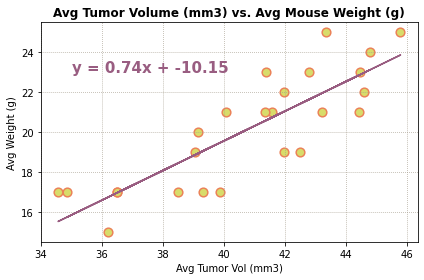

In [325]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# 
correlation = st.pearsonr(avg_tumor_vol,mouse_wgt)
print(f'The correlation between Avg Tumor Volume and Mouse Weight is {round(correlation[0],2)}.')

# add linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(avg_tumor_vol, mouse_wgt)
regress_values = avg_tumor_vol * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# chart the scatter plot with regression line and equation annotation
plt.scatter(avg_tumor_vol, mouse_wgt, color='#d8dc6a', edgecolors='#eb8258', s=75, linewidth=1.5)
plt.plot(avg_tumor_vol, regress_values, 'r-', color='#995d81')
plt.annotate(line_eq, (35,23), fontsize=15, color='#995d81', weight='bold')


print(f'The r-squared value is: ' + str(round(rvalue**2,2)) + '.')


# set and format title, x- and y-axis labels
plt.title('Avg Tumor Volume (mm3) vs. Avg Mouse Weight (g)', weight='bold')
plt.xlabel('Avg Tumor Vol (mm3)')
plt.ylabel('Avg Weight (g)')

# show and format grid lines
plt.rc('grid', linestyle=':', color='#a39b8b', linewidth=.75)
plt.grid(True)

plt.tight_layout()
plt.show()